# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-05-26 downloaded.
kospi200_prices_250526.csv saved
df_prices updated
Execution time of download: 52 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-05-26 downloaded.
etfs_weather_250526.csv saved
df_prices updated
Execution time of download: 2 secs


In [13]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [18]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

24 securities from 2023-03-29 to 2025-05-23 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [19]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None

TDF_2406: done
HANA_2408: done
SAVE_2503: done
FISA_2504: done


In [20]:
# FISA
tickers = tickers + ['K55363DD7958']
len(tickers)

25

In [21]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
24 tickers set to download


100%|███████████████████████████████████████████████████████████████| 24/24 [00:52<00:00,  2.19s/it]

... done
24 securities from 2023-03-29 to 2025-05-26 downloaded.
funds_prices_250526.csv saved
df_prices updated
Execution time of download: 53 secs


In [22]:
#_ = fund.save()

In [16]:
#fund.portfolio_data['universe']

### Master

In [110]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210BR6654,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6480,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6522,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105BC8507,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55105BC8523,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ce,삼성증권,일반,삼성,주식혼합,TDF,글로벌


In [7]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [106]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [107]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

8

In [108]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [109]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.91it/s]


5.1 secs elapsed, 0.1 secs paused (2.0%)


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.77it/s]

0.8 secs elapsed, 0.0 secs paused (0.0%)
fundm_info_250514.csv saved


### Monthly

In [111]:
fund = PM.create_universe('UV_FNDM')

315 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [114]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [115]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250501.csv loaded
323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded
ERROR: 8 tickers missing cost data


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [116]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded
Master data for 323 funds loaded.
Cost data transaction_cost_250501.csv loaded
Cost data saved to transaction_cost_250514.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [12]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded


In [13]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [14]:
fund.get_names(tickers)

0) K55234DF3150: IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
1) K55214CD4825: 유진챔피언중단기채증권자투자신탁(채권)ClassC-Re
2) KR5236AS4818: 한국밸류10년투자증권투자신탁 1(주식)종류C-E

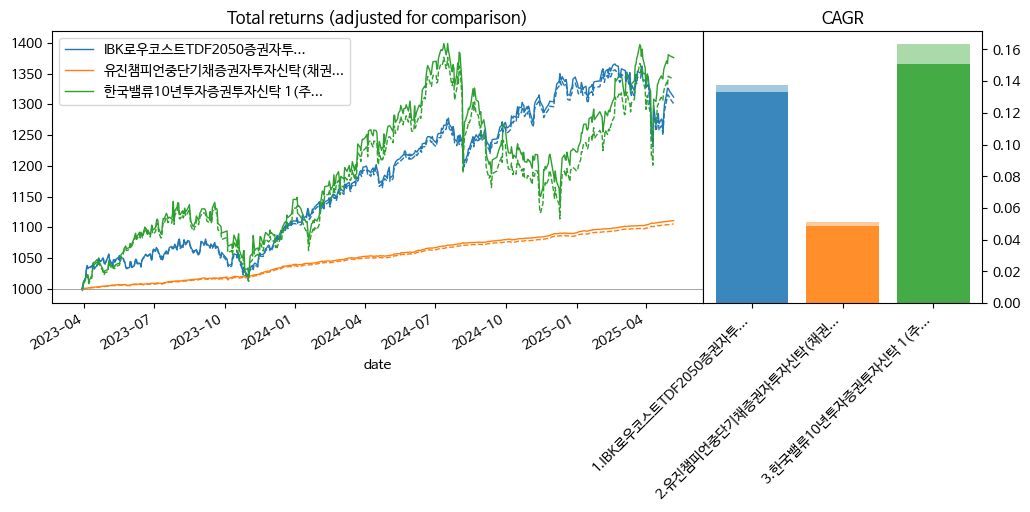

In [15]:
fund.plot(tickers, cost=cost, base=1000)

## LIQ

In [14]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [15]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded


In [16]:
#liq.get_names()

In [17]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.53it/s]

3.2 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-05-26 downloaded.
krx_liq_prices_250526.csv saved
df_prices updated
Execution time of download: 4 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [8]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [14:25<00:00,  4.33s/it]


14.4 mins elapsed, 32.0 secs paused (3.7%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 downloaded
kospi200_ratios_250509.csv saved


In [9]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [10]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-05-09
Price: 2022-01-03 ~ 2025-05-09


# Performance

In [5]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [6]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per2_250509.csv loaded

WTR_2407:
6 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr2412_static_241218.csv loaded



In [19]:
pm.load('LIQ')

LIQ:
24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Transaction record pf_liq_static_240103.csv loaded



security_names updated
Data of tickers 009900, 016380 downloaded


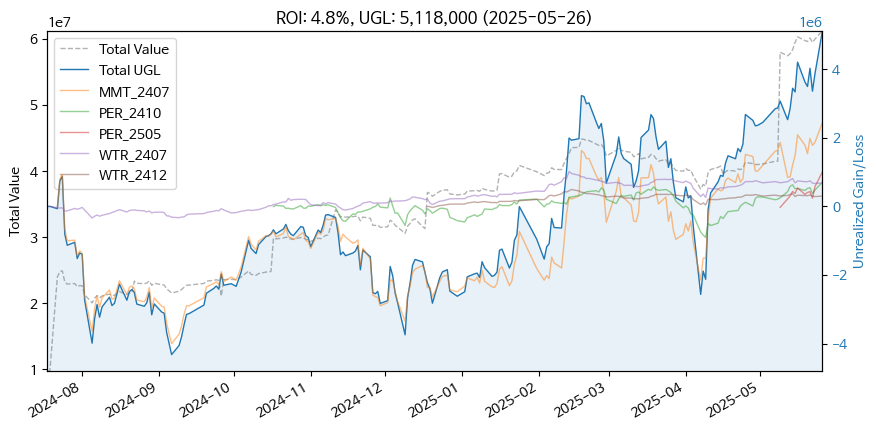

In [7]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [25]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [26]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2025-05-09,2024-07-18,2024-12-18,2024-07-18
end,2025-05-26,2025-05-26,2025-05-26,2025-05-26,2025-05-26,2025-05-26
buy,"61,756,350","12,249,374","16,292,303","10,364,836","5,782,957","106,445,820"
sell,"46,784,778","2,617,050",0.0,"942,797",0.0,"50,344,625"
value,"17,410,881","10,330,088","17,295,046","10,105,074","6,078,140","61,219,229"
ugl,"2,439,308","697,764","1,002,743","683,036","295,183","5,118,034"
roi,0.0395,0.057,0.0615,0.0659,0.051,0.0481


Custom category loaded: portfolio2


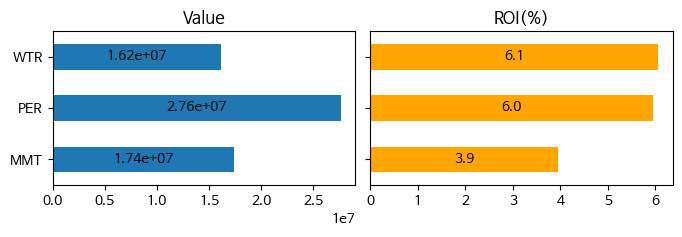

In [27]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df['portfolio'].str.split('_').str.get(0).rename('portfolio2')
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,2))

*print summary for google sheet 금융자산운용*

In [24]:
pm.util_print_summary(date=w_date.value)

2025-05-07, MMT, 2407, , , , 평가, , 60559696, 46784778, 15381437, 1606519, 0.0265
2025-05-07, PER, 2410, , , , 평가, , 12249374, 2617050, 9824378, 192054, 0.0157
2025-05-07, WTR, 2407, , , , 평가, , 10364836, 942797, 10142122, 720084, 0.0695
2025-05-07, WTR, 2412, , , , 평가, , 5782957, 0.0, 6109531, 326574, 0.0565


### All Funds

In [8]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=True)

TDF_2406:
24 securities from 2023-03-29 to 2025-05-26 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_tdf_static_250421.csv loaded

HANA_2408:
24 securities from 2023-03-29 to 2025-05-26 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_hana_static_240731.csv loaded

SAVE_2503:
24 securities from 2023-03-29 to 2025-05-26 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_save_static_250421.csv loaded

FISA_2504:
24 securities from 2023-03-29 to 2025-05-26 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_fisa_static_250429.csv loaded



In [9]:
start_date='2024-07-01'
#pm.plot(start_date=start_date, roi=False)

In [10]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19
end,2025-05-26,2025-05-26,2025-05-26,2025-05-26,2025-05-26
buy,"30,960,600","9,990,000","10,652,630","48,148,612","99,751,842"
sell,-251.0,0.0,"-3,481","-103,069","-106,802"
value,"31,204,320","10,249,077","10,696,129","47,543,295","99,692,821"
ugl,"243,469","259,077","40,018","-708,386","-165,823"
roi,0.00786,0.0259,0.00376,-0.0147,-0.00166


In [23]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')

Custom category loaded: account, asset, manager, region, seller, strategy


In [49]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)

Custom category loaded: name2


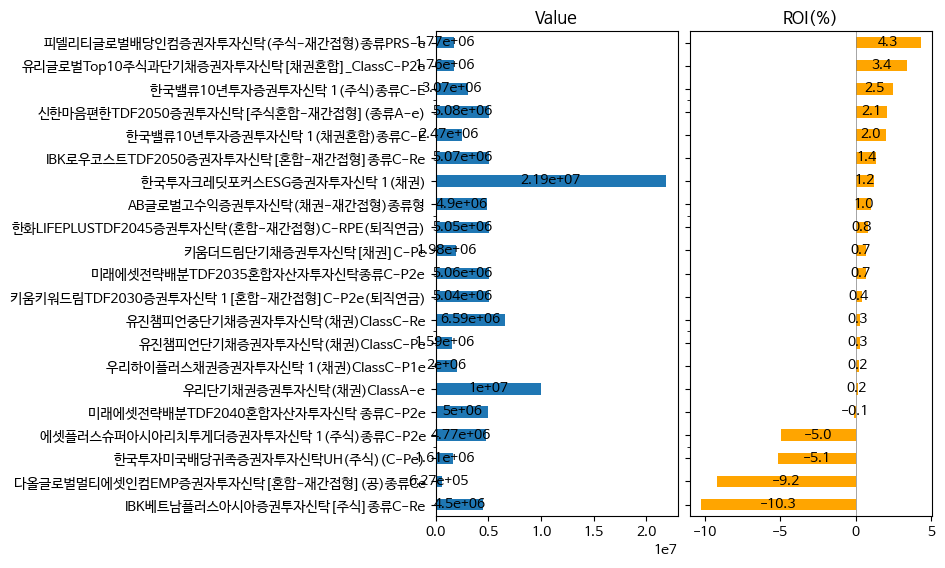

In [50]:
category = 'name2'
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

# Transaction

## MMT

In [51]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_momentum_250515.csv loaded


In [33]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

In [39]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2025-04-16 000150         두산  0.994485     -2448000        0     0.0    0.000   
           003230       삼양식품  1.000000            0  2796000     0.2    0.196   
           012450  한화에어로스페이스  1.000000      -787999  2364000     0.2    0.165   
           042660       한화오션  0.989757      -468600  3045900     0.2    0.213   
           064350       현대로템  0.967033      -436800  3166800     0.2    0.222   
           329180    HD현대중공업  0.969780      2912000  2912000     0.2    0.204   
2025-05-15 003230       삼양식품  1.000000            0  2973000     0.2    0.180   
           012450  한화에어로스페이스  0.979738       838998  3356000     0.2    0.204   
           042660       한화오션  0.988336       244350  3420900     0.2    0.208   
           064350       현대로템  0.981914       113350  3400500     0.2    0.206   
           329180    HD현대중공업  1.000000            0  3332000     0.2    0.202   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

*daily transactions for book keeping*

In [40]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

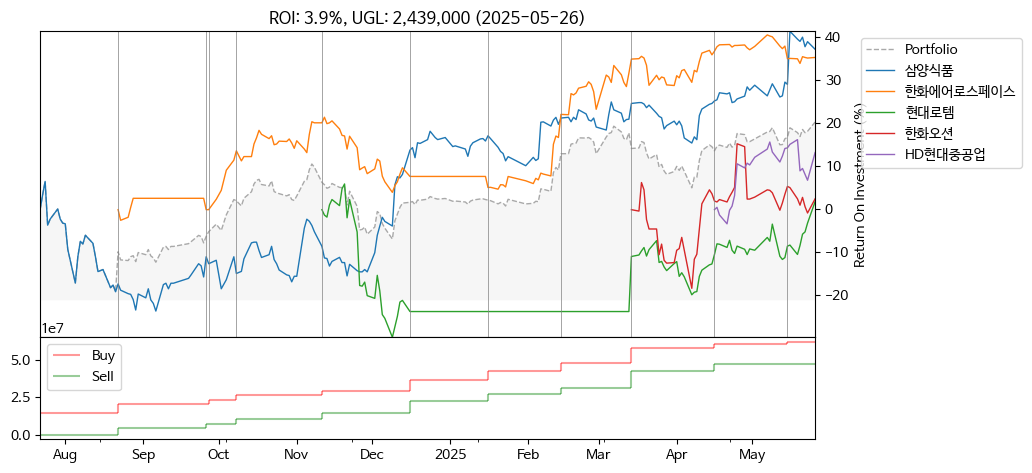

In [54]:
pf_mmt.plot(total=False)

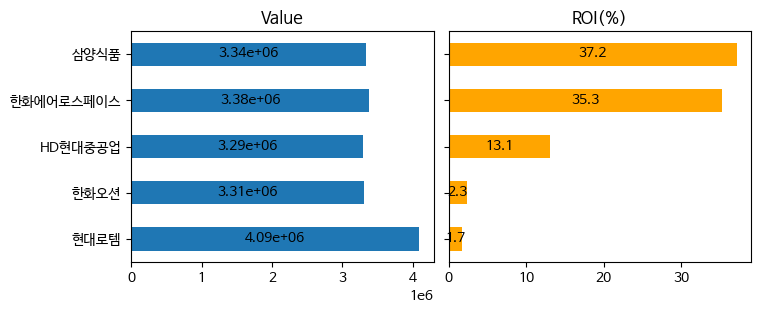

In [55]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

In [66]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-05-16, 61756350, 46784778, 17055398, 2083825, 0.0337


start    2024-07-22
end      2025-05-16
buy      61,756,350
sell     46,784,778
value    17,055,398
ugl       2,083,825
roi          0.0337
dtype: object

In [53]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [54]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [52]:
date_actual = '2025-06-17'
capital = WidgetTransaction.values(1)
capital = 0.12
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-05-20 to 2025-05-19
Weights of tickers determined by Equal weights.
Rebalancing with contribution 12% of the portfolio value (2,093,226)
Mean absolute error of weights: 4 %
Deployed capital: 1,193,354
ROI: 3.6%, UGL: 2,430,501 (2025-05-26)
Set save=True to save transaction record


In [53]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-05-15 003230       삼양식품   991000            0    3     0.2    0.180   
           012450  한화에어로스페이스   826168            1    4     0.2    0.204   
           042660       한화오션    81450            3   42     0.2    0.208   
           064350       현대로템   113350            1   30     0.2    0.206   
           329180    HD현대중공업   416500            0    8     0.2    0.202   
2025-05-26 003230       삼양식품  1116000           -3    0     0.0    0.000   
           012450  한화에어로스페이스   833000            0    4     0.2    0.179   
           042660       한화오션    78900            7   49     0.2    0.207   
           064350       현대로템   136600           -2   28     0.2    0.205   
           079550     LIG넥스원   433500            9    9     0.2    0.209   
           329180    HD현대중공업   412500            1    9     0.2    0.199   

                       date*  
date       ticker             
2025-05-15 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16  
2025-05-26 003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           079550 2025-06-17  
           329180 2025-06-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [19]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [27]:
pf, date_actual = 'PER_2410', '2025-11-12'
#pf, date_actual = 'PER_2505', '2026-05-12'

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-05-23 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets


In [21]:
# run after editting record file
pf_per.update_record()

*Set assets to liquidate as delisted from KOSPI200*

In [22]:
tickers_liq = pf_per.check_universe()

In [28]:
pf_per.view_record(-1, nshares=False)

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-11-11 010060   OCI홀딩스  1.006689      -358800  478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200  386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200  428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020  500840    0.05    0.052   
           047040     대우건설  0.993122      -461645  508900    0.05    0.053   
           088350     한화생명  1.001745       515700  515700    0.05    0.054   
           078930       GS  1.002404       499200  499200    0.05    0.052   
           111770     영원무역  0.996264       481800  481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750  519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600  427600    0.05    0.044   
           001450     현대해상  1.000000       505750  505750    0.05    0.053   
           009900     명신산업  1.008715       495720  495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000  520000    0.05    0.054   
           000270       기아  1.010684       468000  468000    0.05    0.049   
           024110     기업은행  1.002059       509950  509950    0.05    0.053   
           005850      에스엘  1.014354       501600  501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560  514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650  518650    0.05    0.054   
           005380      현대차  1.007160       419000  419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700  416700    0.05    0.043   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [48]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-05-14, 12249374, 2617050, 10260148, 627824, 0.0513


start    2024-10-17
end      2025-05-14
buy      12,249,374
sell      2,617,050
value    10,260,148
ugl         627,824
roi          0.0513
dtype: object

In [49]:
#pf_per.update_record()
#pf_per.view_record(-2)

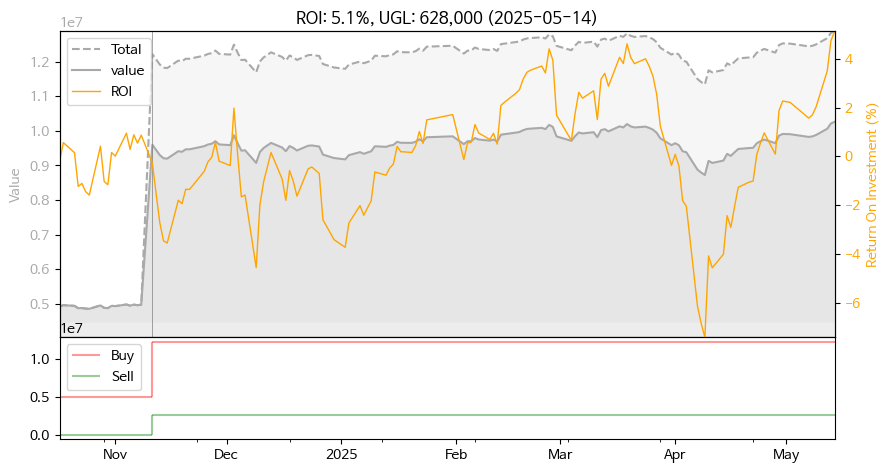

In [50]:
pf_per.plot()

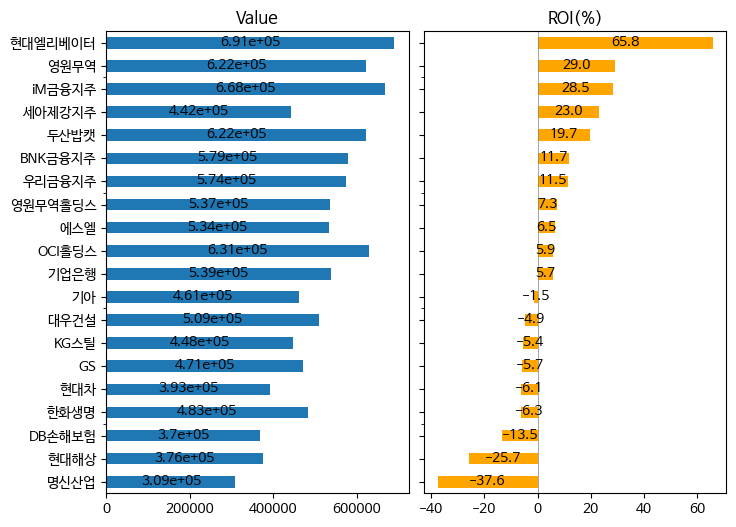

In [51]:
_ = pf_per.plot_assets(figsize=(8,6))

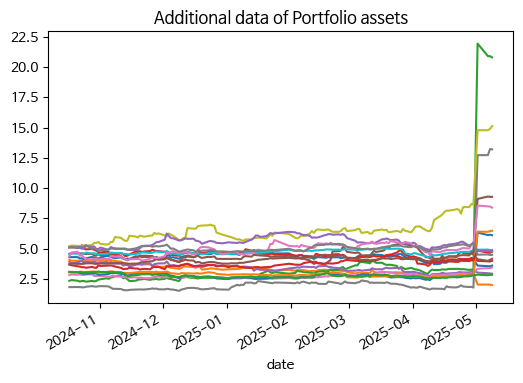

In [52]:
_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [53]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    #halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_per.transaction_halt(**kw) 

In [38]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-03-10 to 2025-05-09
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 2 %
ROI: -0.2%, UGL: -29,615 (2025-05-09)
All transactions saved to pf_k200_per2_250509.csv


In [37]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-09 036460   한국가스공사   37800           21   21    0.05    0.049   
           003240     태광산업  825000            1    1    0.05    0.051   
           402340    SK스퀘어   93700            8    8    0.05    0.046   
           009240       한샘   41600           19   19    0.05    0.049   
           015760     한국전력   26950           30   30    0.05    0.050   
           006360     GS건설   17890           46   46    0.05    0.051   
           000660   SK하이닉스  190100            4    4    0.05    0.047   
           000210       DL   33450           24   24    0.05    0.050   
           001740   SK네트웍스    4155          198  198    0.05    0.051   
           178920   PI첨단소재   16410           50   50    0.05    0.051   
           005250   녹십자홀딩스   13840           59   59    0.05    0.051   
           002710    TCC스틸   19910           41   41    0.05    0.051   
           088350     한화생명    2645          311  311    0.05    0.051   
           001450     현대해상   21550           38   38    0.05    0.051   
           009970  영원무역홀딩스   98600            8    8    0.05    0.049   
           010060   OCI홀딩스   67000           12   12    0.05    0.050   
           047040     대우건설    3475          237  237    0.05    0.051   
           078930       GS   38750           21   21    0.05    0.050   
           326030   SK바이오팜   90400            9    9    0.05    0.050   
           005830   DB손해보험   90200            9    9    0.05    0.050   

                        date*  
date       ticker              
2025-05-09 036460  2025-05-12  
           003240  2025-05-12  
           402340  2025-05-12  
           009240  2025-05-12  
           015760  2025-05-12  
           006360  2025-05-12  
           000660  2025-05-12  
           000210  2025-05-12  
           001740  2025-05-12  
           178920  2025-05-12  
           005250  2025-05-12  
           002710  2025-05-12  
           088350  2025-05-12  
           001450  2025-05-12  
           009970  2025-05-12  
           010060  2025-05-12  
           047040  2025-05-12  
           078930  2025-05-12  
           326030  2025-05-12  
           005830  2025-05-12

In [ ]:
pf_per2 = PM.create_portfolio('PER_2410', **kw_cost)
df2 = pf_per2.valuate(total=False)
df = pf_per.valuate(total=False)
tkrs = df.index.difference(df2.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

## WTR
*modified all weather*

In [4]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-02'

In [5]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-05-23 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_wtr_static_250213.csv loaded


In [6]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [7]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32493            7   50  0.1670   
           148070          KOSEF 국고채10년  113035           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            5  129  0.1670   
           379800      KODEX 미국S&P500TR   18733           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34061            2   52  0.1667   
           148070         KIWOOM 국고채10년  115030            2   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20154            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

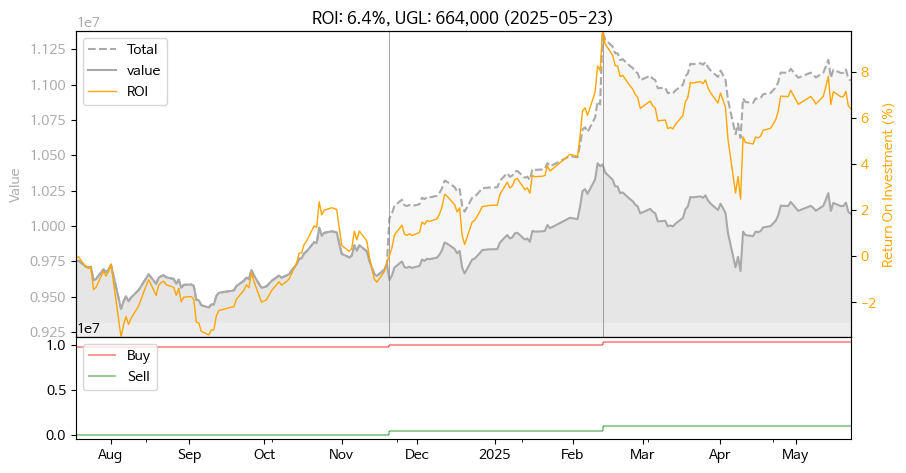

In [8]:
pf_wtr.plot(total=True)

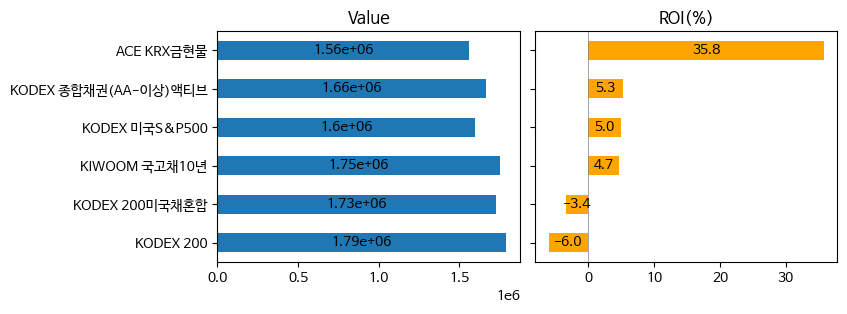

In [9]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [10]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-05-23, 10364836, 942797, 10085948, 663910, 0.0641


start    2024-07-18
end      2025-05-23
buy      10,364,836
sell        942,797
value    10,085,948
ugl         663,910
roi          0.0641
dtype: object

In [11]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [12]:
#pf_wtr.performance(metrics=METRICS)

In [11]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [13]:
capital = WidgetTransaction.values(1)
#capital = 0.84
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)
pf_wtr.view_record(-2, nshares=True)

6 tickers selected by Selected from 2025-05-23 to 2025-05-23
Weights of tickers determined by Equal weights.
Rebalancing with contribution 1,000,000
Mean absolute error of weights: 2 %
Deployed capital: 785,757
ROI: 5.9%, UGL: 663,624 (2025-05-23)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34061            2   52  0.1667   
           148070         KIWOOM 국고채10년  115030            2   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20154            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-05-23 069500             KODEX 200   34640            1   53  0.1667   
           148070         KIWOOM 국고채10년  116735            0   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  118815            1   15  0.1667   
           284430        KODEX 200미국채혼합   12910            9  143  0.1667   
           379800        KODEX 미국S&P500   18335           13  100  0.1667   
           411060            ACE KRX금현물   20790           13   88  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-05-23 069500    0.169 2025-08-14  
           148070    0.161 2025-08-14  
           273130    0.164 2025-08-14  
           284430    0.170 2025-08-14  
           379800    0.169 2025-08-14  
           411060    0.168 2025-08-14

In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [25]:
kw_st = dict(
    tickers = ['069500']
)

In [26]:
pf_srt = PM.create_portfolio('SRT', **kw_cost, **kw_st)

6 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_srt_static_250526.csv loaded


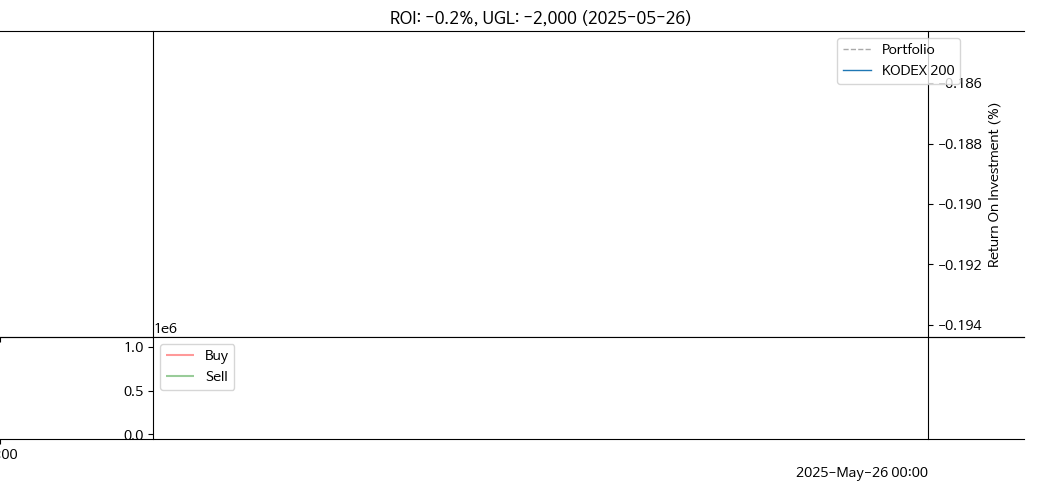

In [27]:
pf_srt.plot(total=False)

In [28]:
pf_srt.valuate()

start    2025-05-26
end      2025-05-26
buy       1,056,316
sell            0.0
value     1,054,369
ugl          -1,947
roi        -0.00184
dtype: object

In [17]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [10]:
date_actual = '2025-05-27'
kw = dict(
    buy = {'069500': 1056360}, 
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual = date_actual,
)
#_ = pf_srt.transaction_halt(**kw) 

ERROR: No transaction record exits


In [ ]:
date_actual = '2025-05-27'
kw = dict(
    #nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    date_actual = date_actual
)

#_ = pf_srt.transaction_pipeline(**kw)

In [29]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-26,069500,KODEX 200,35190,30,30,1.0,1.0,2025-05-27


## LIQ

In [28]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_liq_static_250526.csv loaded


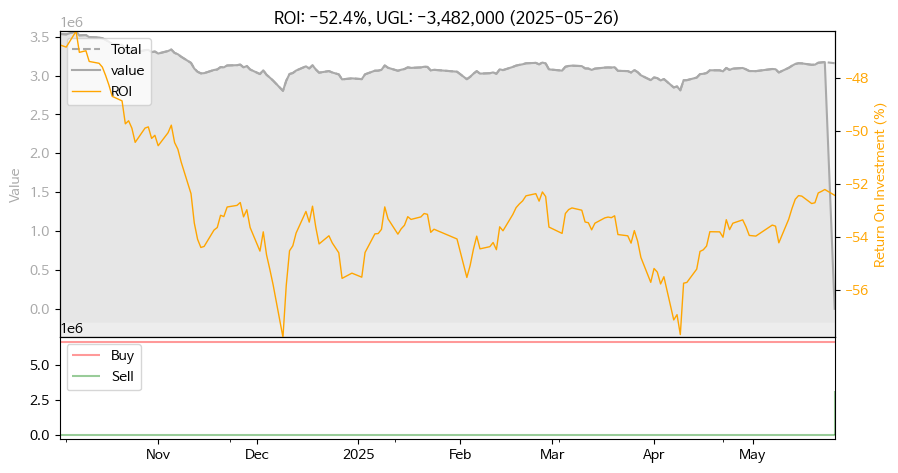

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

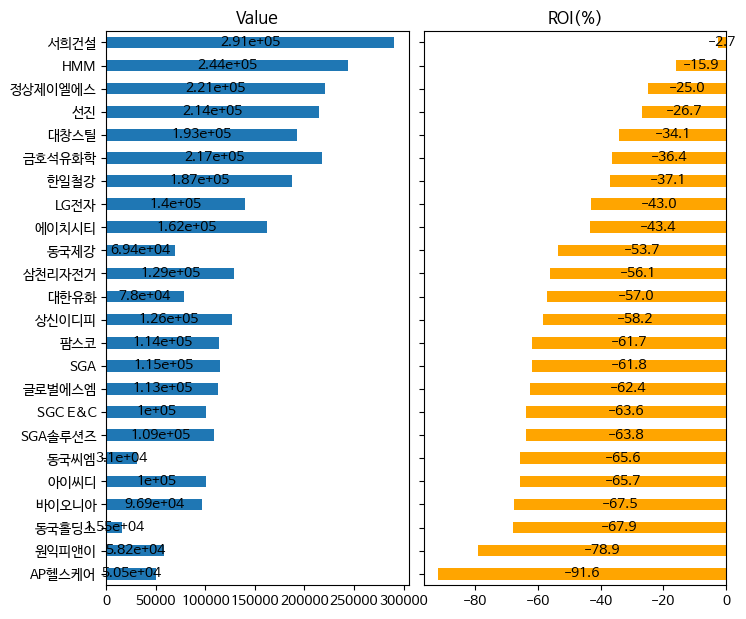

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## IRP

In [11]:
kw_st = dict(
    #security_names = fund_names
)

In [12]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

24 securities from 2023-03-29 to 2025-05-26 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_tdf_static_250421.csv loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [17]:
#pf_tdf.check_universe()

In [18]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

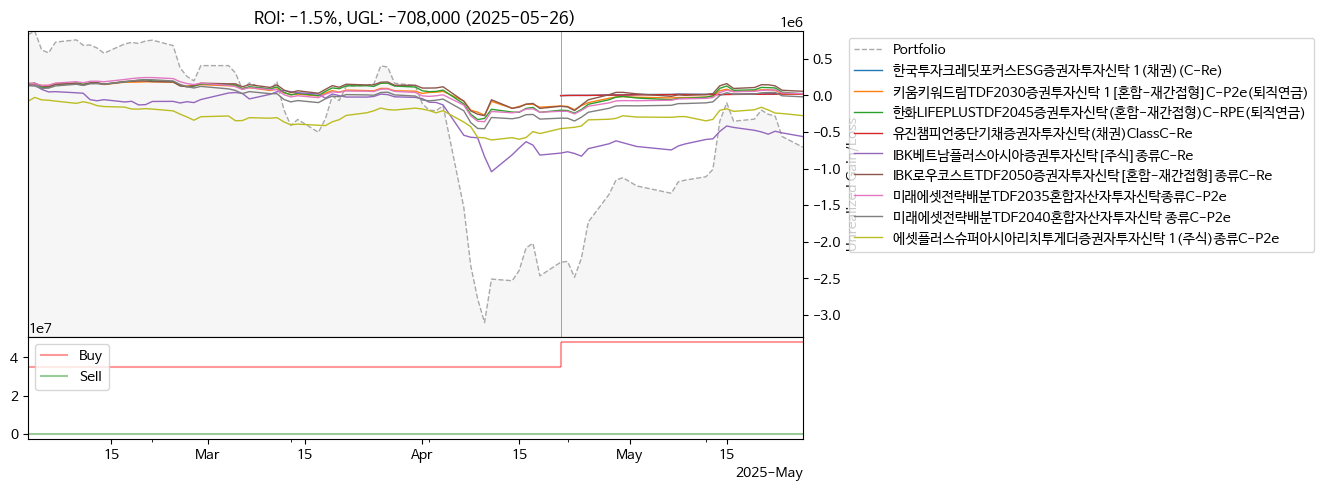

In [15]:
start = '2025-02-01'
pf_tdf.plot(start, total=False, roi=False)

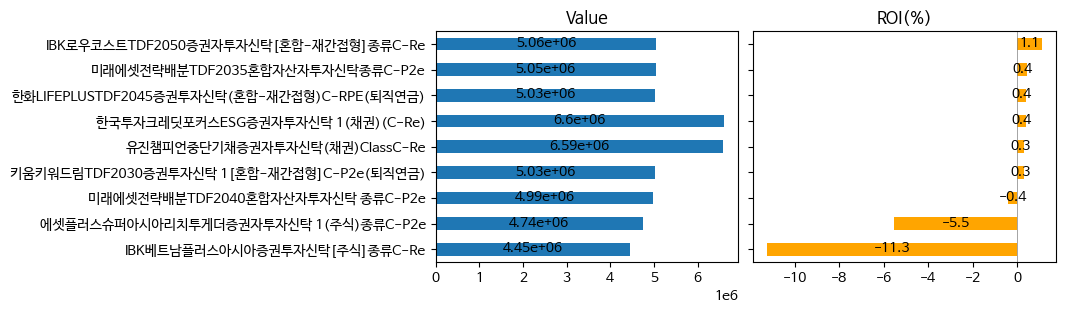

In [14]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [141]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-05-08, 48148612, -102860, 47070927, -1180545, -0.0245


start    2024-06-19
end      2025-05-08
buy      48,148,612
sell       -102,860
value    47,070,927
ugl      -1,180,545
roi         -0.0245
dtype: object

In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [55]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-05-02 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-05-02 K55101BV9571     -1346266  5242850  0.1111    0.111 2025-05-02  
           K55206C95800       116263  5242850  0.1111    0.111 2025-05-02  
           K55213C50702       253272  5242850  0.1111    0.111 2025-05-02  
           K55214CD4825     -1341987  5242850  0.1111    0.111 2025-05-02  
           K55234BY9966       892520  5242850  0.1111    0.111 2025-05-02  
           K55234DF3150       207500  5242850  0.1111    0.111 2025-05-02  
           K55301BU6139       209773  5242850  0.1111    0.111 2025-05-02  
           K55301BU6253       361393  5242850  0.1111    0.111 2025-05-02  
           K55364CF7048       490383  5242850  0.1111    0.111 2025-05-02

## HANA

In [13]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [14]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

24 securities from 2023-03-29 to 2025-05-20 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [15]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

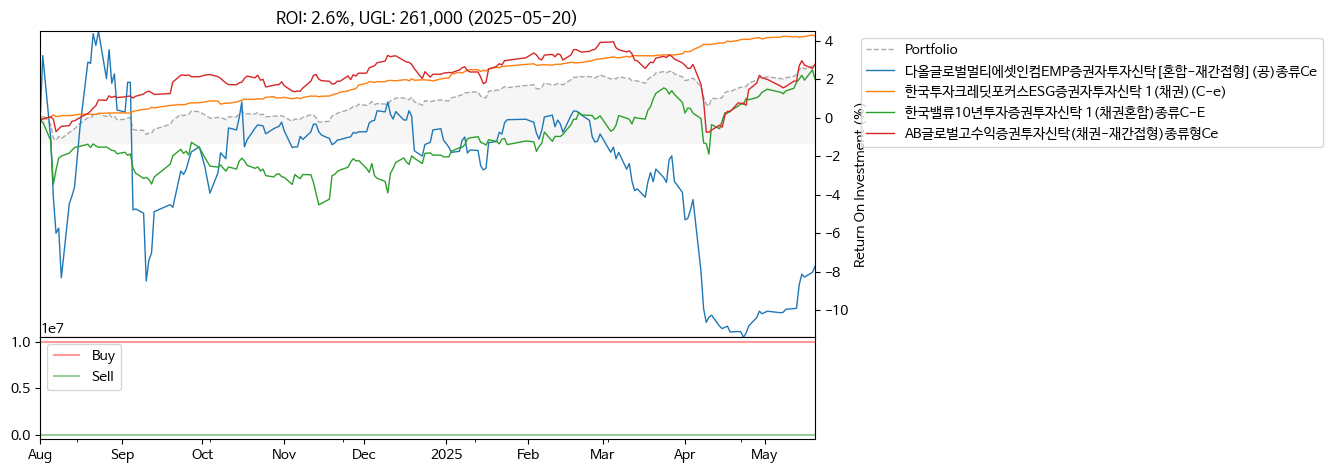

In [16]:
pf_hana.plot(total=False, roi=True)

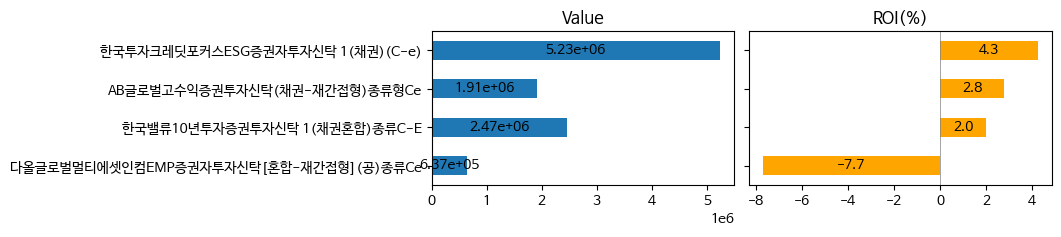

In [17]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [4]:
pf = 'SAVE_2503'

In [5]:
kw_st = dict(
    #security_names = fund_names
)

In [6]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

24 securities from 2023-03-29 to 2025-05-16 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_save_static_250421.csv loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17

In [7]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

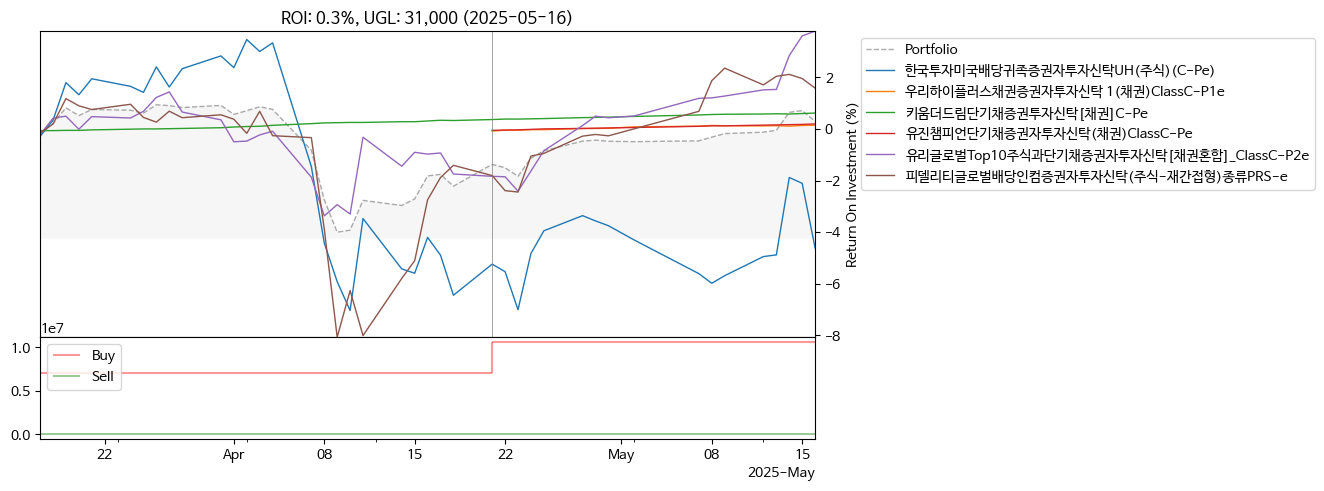

In [8]:
pf_save.plot(total=False, roi=True)

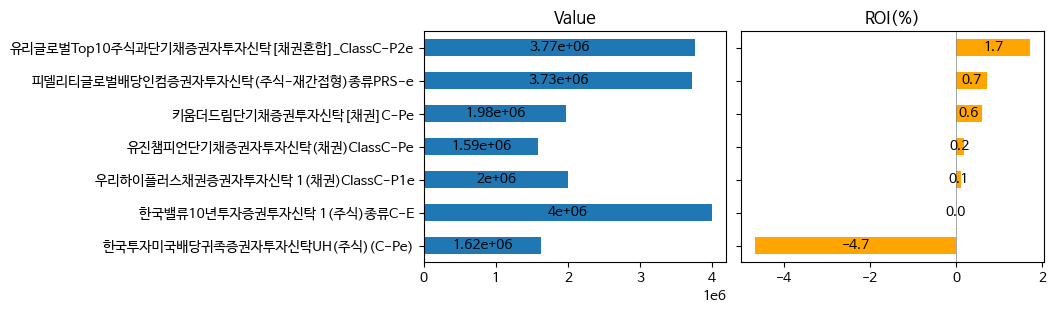

In [16]:
_ = pf_save.plot_assets(figsize=(8,3))

In [10]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-03-17, 2025-05-16, 10652630, -3481, 10687182, 31071, 0.00292


start    2025-03-17
end      2025-05-16
buy      10,652,630
sell         -3,481
value    10,687,182
ugl          31,071
roi         0.00292
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-06-18'

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    #buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'KR5236AS4818':4e6},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-05-16
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.1%, UGL: 27,901 (2025-05-16)


In [13]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)

6 tickers selected by Selected from 2024-11-18 to 2025-05-16
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 3
ROI: 0.3%, UGL: 27,902 (2025-05-16)
Set save=True to save transaction record


In [15]:
pf_save.view_record()

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-05-16 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           KR5236AS4818                한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17  
2025-05-16 K55101D20874            0  1626497    0.25    0.087 2024-06-18  
           K55107BU0252            0  2004546     NaN    0.107 2024-06-18  
           K55206C11278            0  1981105    0.25    0.106 2024-06-18  
           K55214B30803            0  1588828     NaN    0.085 2024-06-18  
           K55307DH1659      2000000  3768252    0.25    0.202 2024-06-18  
           KR5235AK9808      2000000  3729644    0.25    0.199 2024-06-18  
           KR5236AS4818      4000000  4000000     NaN    0.214 2025-05-16

## FISA

In [4]:
kw_st = dict(
    method_select = 'selected'    
)

In [5]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record()

24 securities from 2023-03-29 to 2025-05-23 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_fisa_static_250429.csv loaded


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25

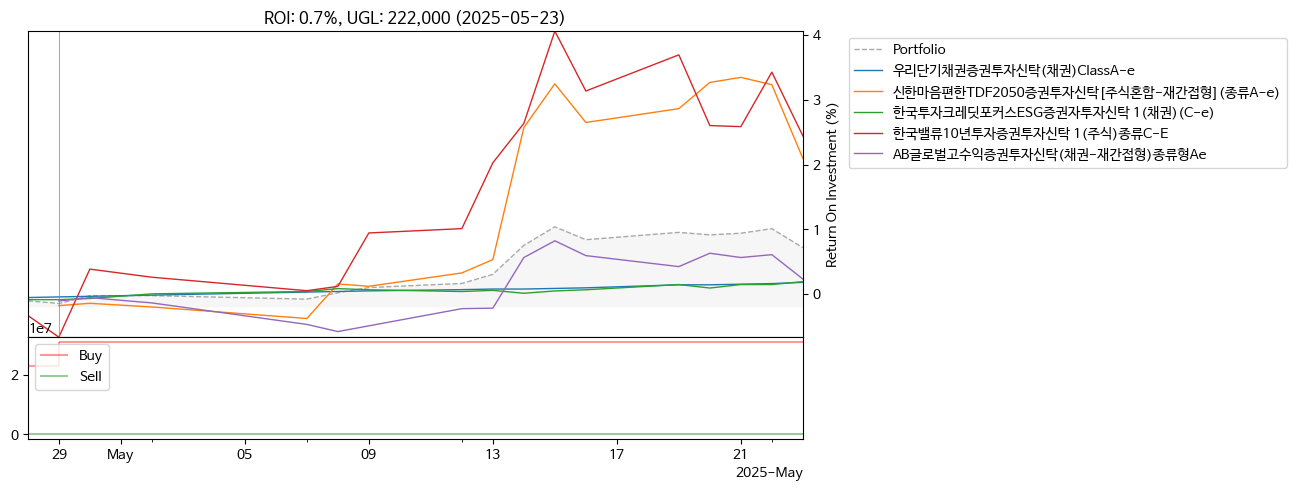

In [6]:
pf_fisa.plot(total=False, roi=True)

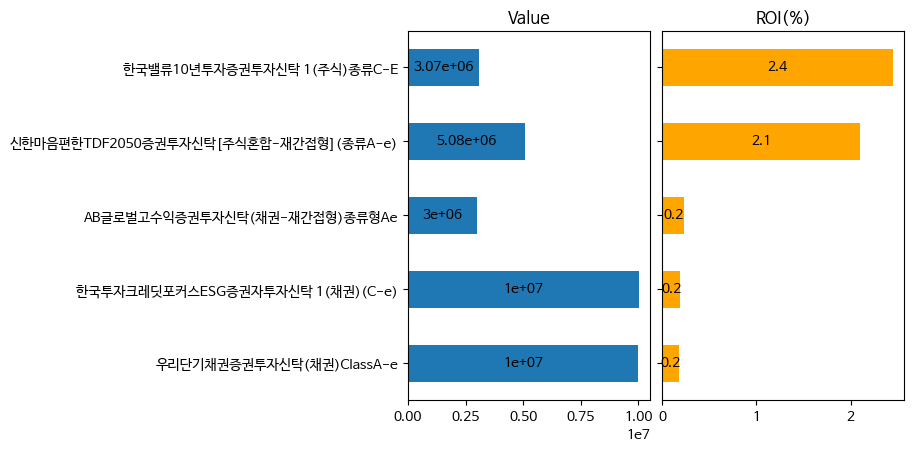

In [7]:
_ = pf_fisa.plot_assets(roi=True)

In [129]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-05-08, 30960600, -252.0, 30969738, 8886, 0.000287


start    2025-04-28
end      2025-05-08
buy      30,960,600
sell         -252.0
value    30,969,738
ugl           8,886
roi        0.000287
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-04-25'

# new buy
tickers = ['K55210CO3737','KR5370AP9949']
capital = [5e6, 3e6]
capital = dict(zip(tickers, capital))

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

ERROR: No transaction record exits
ERROR: No transaction record


In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

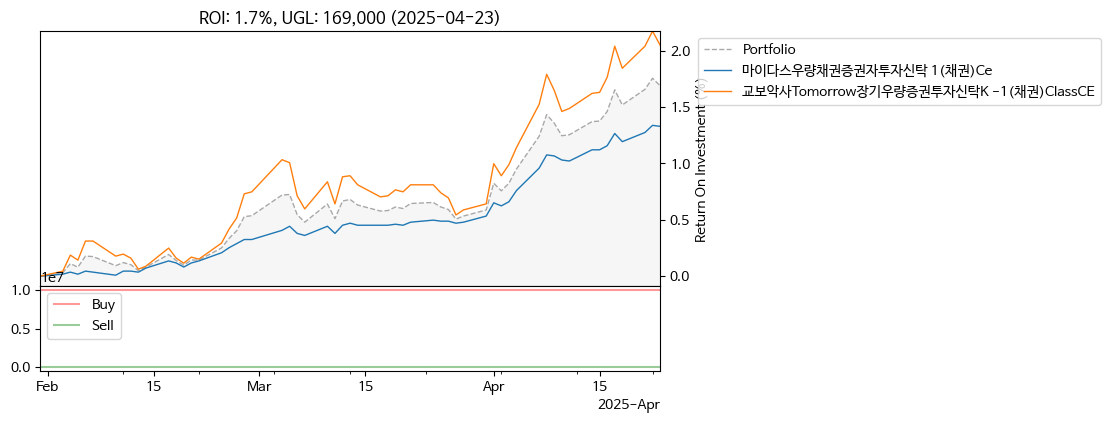

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

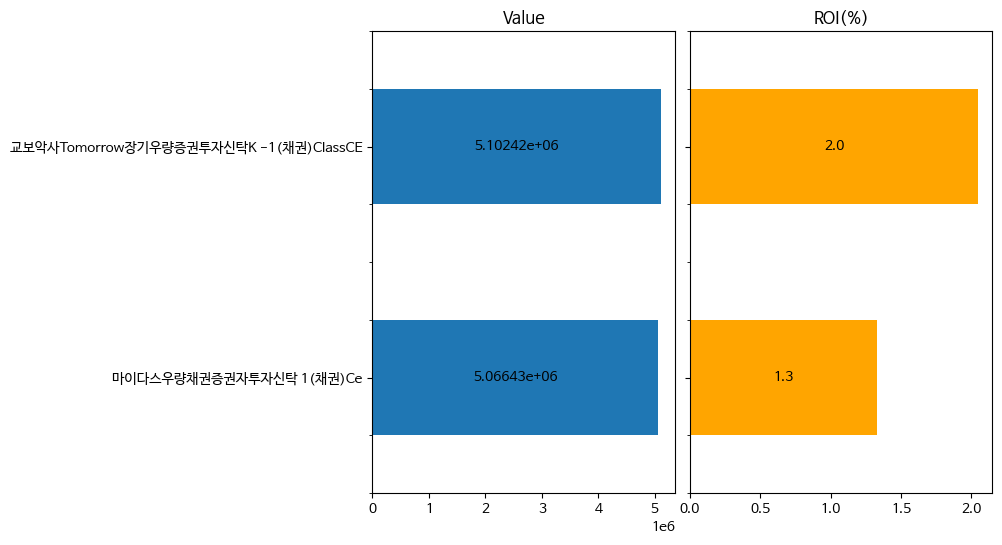

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing